# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [350]:
# Melakukan import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [325]:
# Memuat dataset dari hasil clustering
df_bank_transaction = pd.read_csv("Dataset_clustering.csv")
df_bank_transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1


In [326]:
# Memerika informasi dari dataset
df_bank_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   float64
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   float64
 12  LoginAttempts            2512 non-null   float64
 13  AccountBalance           2512 non-null   float64
 14  PreviousTransactionDate 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [327]:
# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Location', 'CustomerOccupation', 'Channel']

# Encode kolom kategorikal
for column in categorical_columns:
    df_bank_transaction[column] = label_encoder.fit_transform(df_bank_transaction[column])

# Menampilkan dataframe untuk memastikan encoding diterapkan
df_bank_transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36,D000380,162.198.218.92,M015,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15,D000051,13.149.61.4,M052,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23,D000235,215.97.143.157,M009,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33,D000187,200.13.225.150,M002,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,D000308,65.164.3.100,M091,2,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1


In [328]:
# Melakukan one-hot-encoding pada kolom TransactionType
df_bank_transaction_encoding = pd.get_dummies(df_bank_transaction, columns=['TransactionType'])

# Menampilkan dataframe untuk memastikan encoding diterapkan
df_bank_transaction_encoding.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36,D000380,162.198.218.92,M015,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,0,False,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15,D000051,13.149.61.4,M052,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,0,False,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23,D000235,215.97.143.157,M009,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,2,True,False
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33,D000187,200.13.225.150,M002,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,2,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,D000308,65.164.3.100,M091,2,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,1,True,False


In [329]:
# Membuat instance MinMaxScaller
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df_bank_transaction_encoding.drop(columns=['Cluster']).select_dtypes(
    include=['int64', 'float64']).columns
df_bank_transaction_encoding[numeric_columns] = scaler.fit_transform(df_bank_transaction_encoding[numeric_columns])

# Menampilkan dataframe untuk memastikan normalisasi diterapkan
df_bank_transaction_encoding.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,0.857143,D000380,162.198.218.92,M015,0.0,0.838710,0.0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0,False,True
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,0.357143,D000051,13.149.61.4,M052,0.0,0.806452,0.0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0,False,True
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,0.547619,D000235,215.97.143.157,M009,1.0,0.016129,1.0,0.158621,0.0,0.068637,2024-11-04 08:07:04,2,True,False
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,0.785714,D000187,200.13.225.150,M002,1.0,0.129032,1.0,0.051724,0.0,0.569198,2024-11-04 08:09:06,2,False,True
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0.023810,D000308,65.164.3.100,M091,1.0,0.129032,1.0,0.648276,0.0,0.492591,2024-11-04 08:06:39,1,True,False


In [330]:
# Melakukan drop pada kolom-kolom tertentu
df_bank_transaction_drop = df_bank_transaction_encoding.drop(
    columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address', 'TransactionDate',
             'PreviousTransactionDate'])

# Menampilkan dataframe setelah melakukan dropping
df_bank_transaction_drop.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster,TransactionType_Credit,TransactionType_Debit
0,0.007207,0.857143,0.0,0.838710,0.0,0.244828,0.0,0.336832,0,False,True
1,0.195940,0.357143,0.0,0.806452,0.0,0.451724,0.0,0.918055,0,False,True
2,0.065680,0.547619,1.0,0.016129,1.0,0.158621,0.0,0.068637,2,True,False
3,0.096016,0.785714,1.0,0.129032,1.0,0.051724,0.0,0.569198,2,False,True
4,0.006874,0.023810,1.0,0.129032,1.0,0.648276,0.0,0.492591,1,True,False


In [331]:
# Memisahkan fitur (X) dan target (Y)
X = df_bank_transaction_drop.drop(columns=['Cluster'])
y = df_bank_transaction_drop['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk set peltihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 10), y_train=(2009,)
Test set shape: X_test=(503, 10), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [332]:
# Pelatihan Model
# Mendefinisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("Training model selesai")

Training model selesai


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [333]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    evaluate_results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

    return evaluate_results


# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test)
}


def print_evaluate_result(result_list):
    # Memuat dataframe untuk meringkas hasil
    summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

    # Mengisi dataframe dengan hasil
    rows = []
    for model_name, metrics in result_list.items():
        rows.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1-Score': metrics['F1-Score']
        })

    # Mengkonversi daftar kamus menjadi dataframe
    summary_df = pd.DataFrame(rows)

    # Menampilkan dataframe
    print(summary_df)


print_evaluate_result(results)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.878728   0.882359  0.878728  0.879505
1              Decision Tree  0.926441   0.926953  0.926441  0.926682


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [334]:
# Membuat fungsi untuk melakukan evaluasi confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

**Hasil Confusion Matrix Algoritma KNN**<br>
Model K-Nearest Neighbors (KNN) menunjukkan hasil evaluasi sebagai berikut:
1. **Kelas 0** <br> Model berhasil mengidentifikasi 233 transaksi yang masuk ke kelas 0 dengan benar (true positive), kemudian sebanyak 15 transaksi yang sebenarnya masuk kelas 0 terdeteksi masuk ke kelas 2 (false negative). Lalu, terdapat 209 transaksi yang termasuk ke kelas 1 dan 2 diprediksi dengan benar (true negative) dan 14 transaksi yang sebenarnya masuk ke kelas 2 diprediksi sebagai kelas 0 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model KNN untuk memprediksi transaksi yang termasuk dalam kelas 0.
2. **Kelas 1** <br> Model berhasil mengidentifikasi 90 transaksi yang masuk ke kelas 1 dengan benar (true positive), kemudian sebanyak 22 transaksi yang sebenarnya masuk ke kelas 1 terdeteksi ke kelas 2 (false negative). Lalu, terdapat 352 transaksi yang termasuk ke kelas 0 dan 2 diprediksi dengan benar (true negative) dan 10 transaksi yang sebenarnya termasuk kelas 2 diprediksi sebagai kelas 1 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model KNN untuk memprediksi transaksi yang termasuk dalam kelas 1.
3. **Kelas 2** <br> Model berhasil mengidentifikasi 119 transaksi yang masuk ke kelas 2 dengan benar (true positive), kemudian sebanyak 24 transaksi sebenarnya masuk ke kelas 2 terdeteksi ke kelas 0 dan 1 (false negative). Lalu, terdapat 323 transaki yang termasuk ke kelas 0 dan 1 diprediksi dengan benar (true negative) dan 37 transaksi yang sebenarnya termasuk ke kelas 0 dan 1 diprediksi sebagai kelas 2 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model KNN untuk memprediksi transaksi yang termasuk dalam kelas 2.

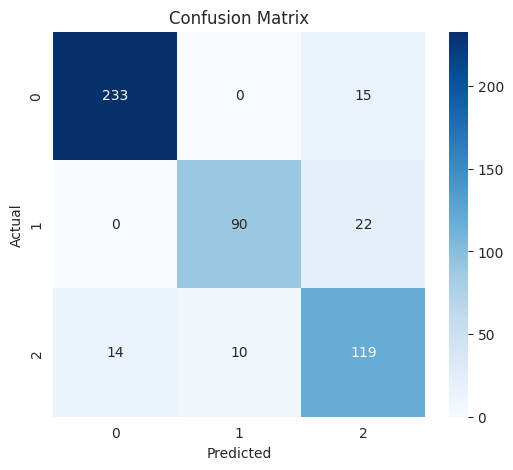

In [335]:
# Hasil Confusion Matrix Algoritma K-Nearest Neighbors
plot_confusion_matrix(results["K-Nearest Neighbors (KNN)"]["Confusion Matrix"])

**Hasil Confusion Matrix Algoritma Decision Tree**<br>
Model Decision Tree menunjukkan hasil evaluasi sebagai berikut:
1. **Kelas 0** <br> Model berhasil mengidentifikasi 244 transaksi yang masuk ke kelas 0 dengan benar (true positive), kemudian sebanyak 4 transaksi yang sebenarnya masuk kelas 0 terdeteksi masuk ke kelas 2 (false negative). Lalu, terdapat 215 transaksi yang termasuk ke kelas 1 dan 2 diprediksi dengan benar (true negative) dan 2 transaksi yang sebenarnya masuk ke kelas 2 diprediksi sebagai kelas 0 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model Decision Tree untuk memprediksi transaksi yang termasuk dalam kelas 0.
2. **Kelas 1** <br> Model berhasil mengidentifikasi 97 transaksi yang masuk ke kelas 1 dengan benar (true positive), kemudian sebanyak 15 transaksi yang sebenarnya masuk ke kelas 1 terdeteksi ke kelas 2 (false negative). Lalu, terdapat 362 transaksi yang termasuk ke kelas 0 dan 2 diprediksi dengan benar (true negative) dan 23 transaksi yang sebenarnya termasuk kelas 2 diprediksi sebagai kelas 1 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model Decision Tree untuk memprediksi transaksi yang termasuk dalam kelas 1.
3. **Kelas 2** <br> Model berhasil mengidentifikasi 118 transaksi yang masuk ke kelas 2 dengan benar (true positive), kemudian sebanyak 25 transaksi sebenarnya masuk ke kelas 2 terdeteksi ke kelas 0 dan 1 (false negative). Lalu, terdapat 341 transaksi yang termasuk ke kelas 0 dan 1 diprediksi dengan benar (true negative) dan 19 transaksi yang sebenarnya termasuk ke kelas 0 dan 1 diprediksi sebagai kelas 2 (false positive). Hasil analisis ini memberikan penjelasan mengenai kemampuan model Decision Tree untuk memprediksi transaksi yang termasuk dalam kelas 2.

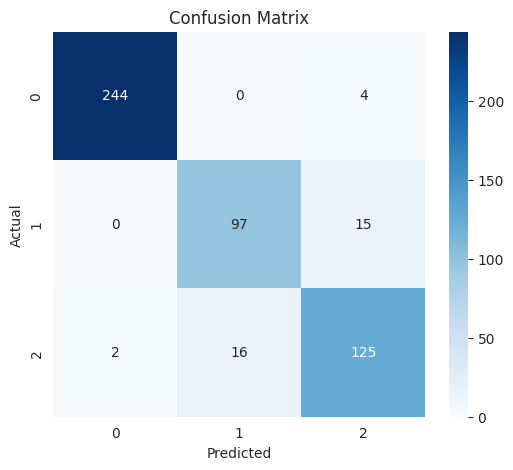

In [336]:
# Hasil Confusion Matrix Algoritma Decision Tree
plot_confusion_matrix(results["Decision Tree"]["Confusion Matrix"])

Berikut ini adalah ringkasan hasil evaluasi untuk masing-masing model klasifikasi.
| Model       | Accuracy    | Precision   | Recall      | F1-Score    |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| K-Nearest Neighbors | 0.878728 | 0.882359 | 0.878728 | 0.879505 |
| Decision Tree | 0.926441 | 0.926953 | 0.926441 | 0.926682
1. **K-Nearest Neighbors (KNN)** menunjukkan akurasi sebesar 87.87%. Model ini memiliki precision 88.24%, recall 87.87%, dan F1-score 87.95%. Nilai precision sangat tinggi, menunjukkan bahwa model berkemungkinan besar mampu memprediksi transaki sebagai kelas 0, 1, atau 2 dengan benar.
2. **Decision Tree** menunjukkan akurasi sebesar 92.64%. Model ini memiliki precision 92.70%, recall 92.64%, dan F1-score 92.67%. Nilai precision yang sangat tinggi, menunjukkan bahwa model berkemungkinan besar mampu memprediksi transaki sebagai kelas 0, 1, atau 2 dengan benar.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [337]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_neighbors': np.arange(5, 20, 1),
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbai
print(f"Best parameters (Grid Search): {grid_search.best_params_} ")
best_rf_grid = grid_search.best_estimator_

# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=8; total time=   0.0s
[CV] END ....................metric=minkowski, n_neighbors=8; total time=   0.0s
[CV] END ....................metric=minkowski, 

In [338]:
# Definisikan ruang pencarian untuk Random Search
param_dist = {
    'n_neighbors': np.arange(5, 20, 1),
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# Inisialsiasi RandomSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=32, cv=3, n_jobs=1, verbose=2,
                                   random_state=42)
random_search.fit(X_test, y_test)

# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_random = random_search.best_estimator_

# Evalusasi performa model pada test set
random_search_score = best_rf_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ...................metric=euclidean, n_neighbors=14; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=14; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=14; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=16; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=16; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=16; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=euclidean, n_

In [339]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_neighbors': np.arange(5, 20, 1),
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# Inisialisasi Bayesian Optimization
bayes_search = BayesSearchCV(estimator=knn, search_spaces=param_space, n_iter=32, cv=3, n_jobs=1, verbose=2,
                             random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

# Evaluasi hasil model pada test set
bayes_search_score = best_rf_bayes.score(X_train, y_train)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=15; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...................metric=euclidean, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=euclidean, n_neighbors=18; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...................metric=manhattan, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=18; total time=   0.0s
[CV] END ...................metric=manhattan, n_neighbors=18; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ....................metric

Setelah dilakukan hyperparameter tuning pada model K-Nearest Neighbors (KNN) didapatkan hasil yaitu n_neighbors =  5 dan metric = manhattan

In [340]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1)
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbai
print(f"Best parameters (Grid Search): {grid_search.best_params_} ")
best_rf_grid = grid_search.best_estimator_

# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_s

In [341]:
# Definisikan ruang pencarian untuk Random Search
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1)
}

# Inisialsiasi RandomSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=32, cv=3, n_jobs=1, verbose=2,
                                   random_state=42)
random_search.fit(X_test, y_test)

# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_random = random_search.best_estimator_

# Evalusasi performa model pada test set
random_search_score = best_rf_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END criterion=log_loss, max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END criterion=log_loss, max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END criterion=log_loss, max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END criterion=log_loss, max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_split=3; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_split=3; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5

In [342]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1)
}

# Inisialisasi Bayesian Optimization
bayes_search = BayesSearchCV(estimator=dt, search_spaces=param_space, n_iter=32, cv=3, n_jobs=1, verbose=2,
                             random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

# Evaluasi hasil model pada test set
bayes_search_score = best_rf_bayes.score(X_train, y_train)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=entropy, max_depth=7, min_samples_split=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_split=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_split=9; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=log_loss, max_depth=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=log_loss, max_depth=8, min_samples_split=4; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=entropy, max_depth=9, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_split=2; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END criterion=log_loss, max

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [347]:
# Inisialisasi model klasifikasi setelah dilakukan hyperparameter tuning
knn_after_tuning = KNeighborsClassifier(n_neighbors=5, metric='manhattan').fit(X_train, y_train)
dt_after_tuning = DecisionTreeClassifier(random_state=4, criterion='entropy', max_depth=7, min_samples_split=6).fit(
    X_train, y_train)

# Melakukan evalusasi model
results_after_tuning = {
    'K Nearest Neighbors': evaluate_model(knn_after_tuning, X_test, y_test),
    'Decision Tree': evaluate_model(dt_after_tuning, X_test, y_test)
}

# Menampilkan hasil evalusasi
print_evaluate_result(results_after_tuning)

                 Model  Accuracy  Precision    Recall  F1-Score
0  K Nearest Neighbors  0.898608   0.900015  0.898608  0.898468
1        Decision Tree  0.948310   0.953100  0.948310  0.947874


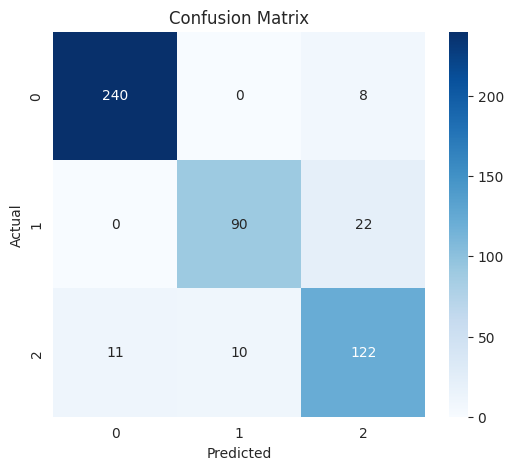

In [344]:
# Menampilkan plot confusion matrix pada model KNN setelah dilakukan hyperparameter tuning
plot_confusion_matrix(results_after_tuning["K Nearest Neighbors"]["Confusion Matrix"])

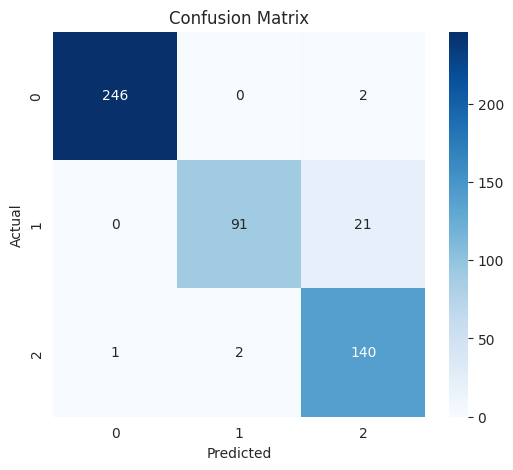

In [345]:
# Menampilkan plot confusion matrix pada model Decision Tree setelah dilakukan hyperparameter tuning
plot_confusion_matrix(results_after_tuning["Decision Tree"]["Confusion Matrix"])

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**
<br> Berikut ini adalah hasil evaluasi sebelum dan sesudah tuning

**Sebelum Tuning**
| Model       | Accuracy    | Precision   | Recall      | F1-Score    |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| K-Nearest Neighbors | 0.878728 | 0.882359 | 0.878728 | 0.879505 |
| Decision Tree | 0.926441 | 0.926953 | 0.926441 | 0.926682 |

<br>

**Setelah Tuning**
| Model       | Accuracy    | Precision   | Recall      | F1-Score    |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| K-Nearest Neighbors | 0.898608 | 0.900015 | 0.898608 | 0.898468 |
| Decision Tree | 0.948310 | 0.953100 | 0.948310 | 0.947874 |

<br>

Berikut ini adalah ringkasan dari perbandingan hasil evaluasi kedua model di atas:
1. K Nearest Neighbors (KNN)
Setelah dilakukan hyperparameter tuning nilai akurasi dari 87.87% menjadi 89.86%, precision dari 88.24% menjadi 90.00%, recall dari 87.87% menjadi 89.86%, dan F1-score dari 87.95% menjadi 89.85%.

2. Decision Tree
Setelah dilakukan hyperparameter tuning nilai akurasi dari 92.64% menjadi 94.83%, precision dari 92.70% menjadi 95.31%, recall dari 92.64% menjadi 94.83%, dan F1-score dari 92.67% menjadi 94.79%.


**Mendeteksi Overfitting**

In [351]:
## Membuat prediksi untuk data latih dan data uji pada KNN
y_train_pred_knn = knn_after_tuning.predict(X_train)
y_test_pred_knn = knn_after_tuning.predict(X_test)

# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

# Menampilkan hasil MSE
print(f"Training MSE: {train_mse_knn}")
print(f"Test MSE: {test_mse_knn}")

Training MSE: 0.15032354405176704
Test MSE: 0.2147117296222664


In [354]:
## Membuat prediksi untuk data latih dan data uji pada Decision Tree
y_train_pred_dt = dt_after_tuning.predict(X_train)
y_test_pred_dt = dt_after_tuning.predict(X_test)

# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse_knn = mean_squared_error(y_train, y_train_pred_dt)
test_mse_knn = mean_squared_error(y_test, y_test_pred_dt)

# Menampilkan hasil MSE
print(f"Training MSE: {train_mse_knn}")
print(f"Test MSE: {test_mse_knn}")

Training MSE: 0.05823792931806869
Test MSE: 0.06958250497017893


**Mendeteksi Underfitting**

In [358]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_underfit_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"KNN Training Accuracy: {train_acc_underfit_knn}")
print(f"KNN Test Accuracy: {test_acc_underfit_knn}")

KNN Training Accuracy: 0.9492284718765555
KNN Test Accuracy: 0.94831013916501


In [357]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_underfit_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"Decision Tree Training Accuracy: {train_acc_underfit_knn}")
print(f"Decision Tree Test Accuracy: {test_acc_underfit_knn}")

Decision Tree Training Accuracy: 0.9492284718765555
Decision Tree Test Accuracy: 0.94831013916501


Dari pengecekan overfitting dan underfitting pada kedua model untuk nilai MSE memiliki selisih yang kecil antara data uji dan data latih. Oleh karena itu, model KNN dan Decision Tree dapat memprediksi data dengan baik. Kemudian, untuk nilai akurasinya juga memiliki selisih yang kecil. Jadi, kedua model dapat memprediski data dengan baik.